In [2]:
import imblearn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from imblearn.datasets import fetch_datasets

In [5]:
mammography = fetch_datasets()['mammography']

In [6]:
X = pd.DataFrame(mammography.data)

In [7]:
Y = pd.DataFrame(mammography.target)

In [8]:
X.shape

(11183, 6)

In [9]:
X.describe()

,0,1,2,3,4,5
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096535e-10,1.297595e-09,5.698113e-10,-2.435705e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


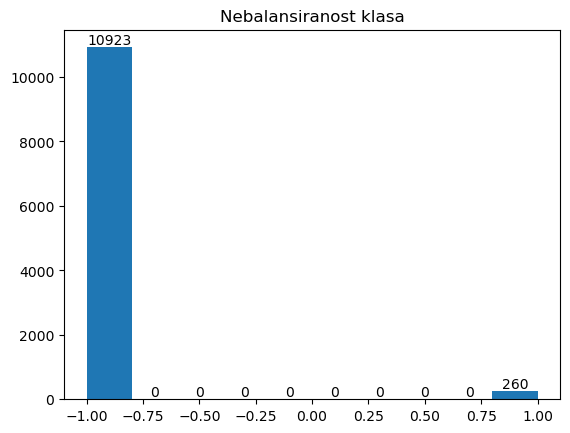

In [11]:
edge, lines, bins = plt.hist(Y)
plt.bar_label(bins)
plt.title('Nebalansiranost klasa')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=123, stratify=Y)

In [14]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [16]:
def report(model, x, y, text='training'):
    y_pred = model.predict(x)
    
    print(text)
    print('-'*100)
    print(classification_report_imbalanced(y, y_pred))
    print('-'*100)
    print(pd.DataFrame(confusion_matrix(y, y_pred), index=['B', 'M'], columns=['B', 'M']))

In [17]:
# Klasicno:

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model_dct = DecisionTreeClassifier(max_depth=6, min_samples_split=50, criterion='gini')

In [20]:
model_dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50)

In [21]:
report(model_dct, X_train, y_train)

training
----------------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.63      0.99      0.79      0.65      8192
          1       0.85      0.63      1.00      0.72      0.79      0.61       195

avg / total       0.99      0.99      0.64      0.99      0.79      0.65      8387

----------------------------------------------------------------------------------------------------
      B    M
B  8170   22
M    72  123


In [24]:
report(model_dct, X_test, y_test, 'testing')

testing
----------------------------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.52      0.99      0.72      0.55      2731
          1       0.72      0.52      1.00      0.61      0.72      0.50        65

avg / total       0.98      0.98      0.53      0.98      0.72      0.54      2796

----------------------------------------------------------------------------------------------------
      B   M
B  2718  13
M    31  34
